In [1]:
import seaborn as sns
import pandas as pd
print(sns.utils.get_data_home())

C:\Users\Awen\seaborn-data


sns.load_dataset("tips") 是 Seaborn 库自带的数据集之一，用于分析餐厅账单与小费之间的关系。这个数据集包含下列字段：

total_bill：float 类型，记录账单总金额。

tip：float 类型，记录小费金额。

sex：object 类型，记录顾客性别，值为 "Male" 或 "Female"。

smoker：object 类型，记录顾客是否吸烟，值为 "Yes" 或 "No"。

day：object 类型，记录用餐日期，分别为 "Thur", "Fri", "Sat", "Sun" 四个值。

time：object 类型，记录用餐时间，分别为 "Lunch" 和 "Dinner" 两个值。

size：int 类型，记录用餐人数。

通过对这些字段的分析，我们可以了解在不同的情况下（比如不同性别、是否吸烟、用餐日期和时间）、不同人数的顾客，在餐厅账单和小费方面的消费习惯和行为差异。该数据集的分析可以帮助餐厅经营者更好地了解顾客需求和行为规律，从而优化经营策略和服务质量。

In [2]:
tips = sns.load_dataset("tips")
# tips = pd.read_csv("dataset/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


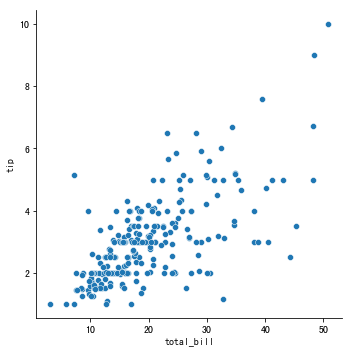

In [3]:
# 绘制散点图
sns.relplot(x="total_bill",y="tip",data=tips)

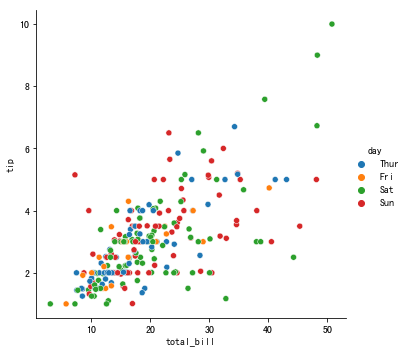

In [4]:
#  hue 参数是用来控制第三个变量的颜色显示的
sns.relplot(x="total_bill",y="tip",hue='day',data=tips)

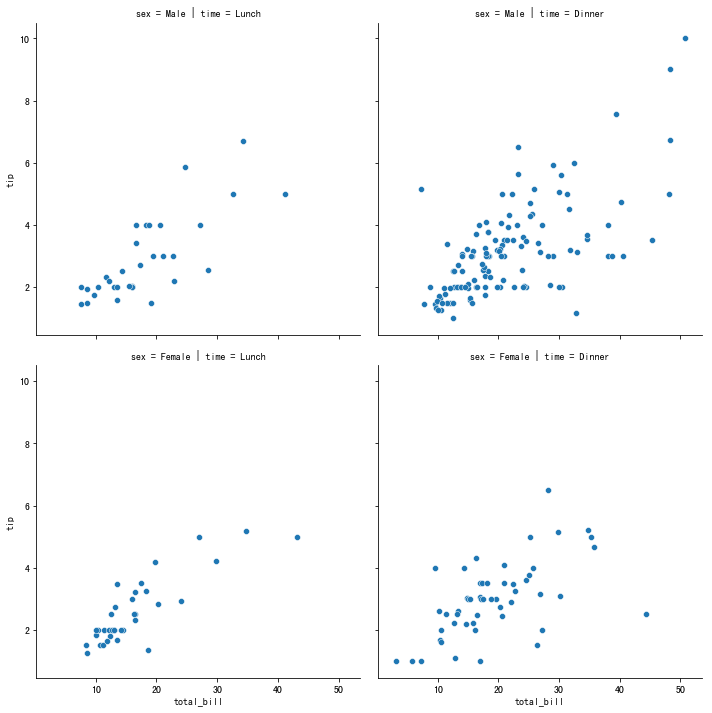

In [5]:
# 用于分析不同性别和用餐时间下账单总金额和小费金额之间的关系
sns.relplot(x="total_bill",y="tip",col="time",row="sex",data=tips)

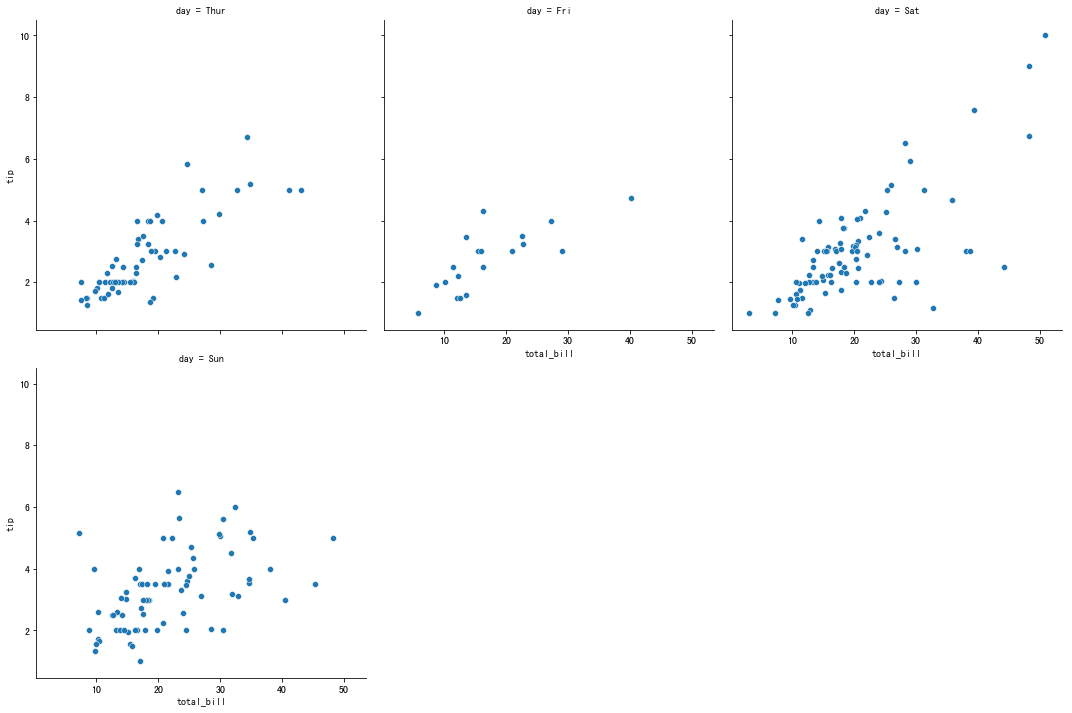

In [6]:
# 用于分析不同日期下账单总金额和小费金额之间的关系；col_wrap=3：指定每行容纳的列数为 3
sns.relplot(x="total_bill",y="tip",col="day",col_wrap=3,data=tips)

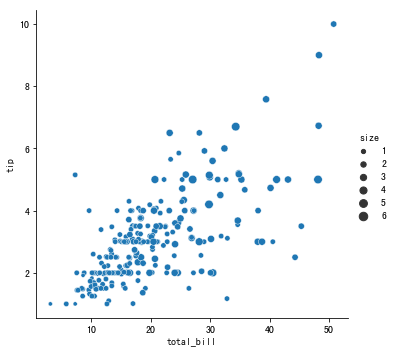

In [7]:
# 展示账单总金额和小费金额之间的关系，同时考虑到用餐人数的影响
# sns.scatterplot(x="total_bill",y="tip",data=tips)
sns.relplot(x="total_bill",y="tip",data=tips,kind="scatter",size="size")

sns.load_dataset("fmri") 是 Seaborn 库中的一个数据加载函数，用于加载名为 fmri 的示例数据集。这个数据集包含了在进行工作记忆任务时，由 18 位受试者在不同时间点的脑部活动数据。

这个数据集包含了以下 5 个变量：

subject：表示受试者的编号，取值范围为 0 到 1。

timepoint：表示时间点，即数据点的采集时间，取值范围为 0 到 18，表示相对于任务开始的时间。

region：表示脑部区域，取值范围为 "frontal"（额叶）和 "parietal"（顶叶）。

event：表示事件类型，即"stim"（刺激）和 "cue"（提示）。

signal：表示测量到的脑部信号强度，是一个实数型变量。

这个数据集是一个示例数据集，用于演示如何使用 Seaborn 库进行可视化，特别是关系数据的可视化。可以使用这个数据集来绘制多种类型的图像，比如线图、散点图、热力图等。通过将不同变量之间的关系进行可视化，我们可以更好地理解脑部在不同事件和时间点下的活动规律，并从中得到更深层次的洞见。

In [8]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


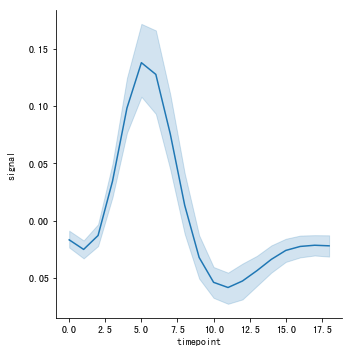

In [9]:
# kind：表示所要绘制的图形类型，这里是 “line”，表示折线图
sns.relplot(x="timepoint",y='signal',data=fmri,kind="line")

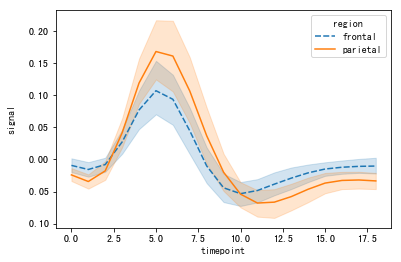

In [10]:
# sns.relplot(x="timepoint",y='signal',data=fmri,kind="line",hue="region",col="event",style="region")
# hue：表示按照哪个变量进行颜色编码；style：表示按照哪个变量进行样式编码；hue_order：表示规定颜色分类标签的排序顺序。
sns.lineplot(x="timepoint",y='signal',data=fmri,hue="region",style="region",hue_order=['frontal','parietal'])

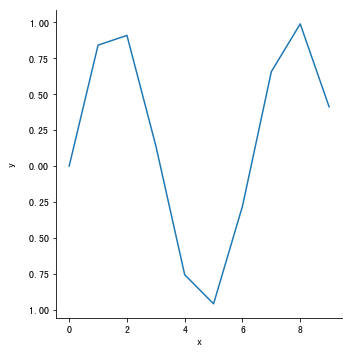

In [11]:
import numpy as np
sns.relplot(x="x",y="y",data=pd.DataFrame({"x":np.arange(10),"y":np.sin(np.arange(10))}),kind="line")

# 笔记：
1. relplot是用来绘制关系数据图的。scatterplot和lineplot是relplot的一个封装。
2. relplot在绘制的时候，不能直接给x和y指定具体的值，而应该使用data参数DataFrame中的列的名字。
3. hue表示的是颜色，应该指定为某个列的名字。那么sns会自动的将指定的列的值的个数，取不同的颜色。
4. col表示分成几个图像，应该指定某个列的名字。那么sns会自动的将DataFrame中这个列的数据，分成多个图。
5. style在绘制折线的时候，可以用来指定线条的样式。

sns.relplot() 是 Seaborn 库中的一个绘图函数，用于绘制基于关系数据的可视化图形。该函数可以绘制散点图、线图、折线图等多种图形，并支持对这些图形进行分面和美化等操作。

具体来说，sns.relplot() 函数采用以下参数：

x 和 y：表示 X 轴和 Y 轴的数据列，可以是 pd.DataFrame 或 pd.Series 的列名或索引。这两个参数是必选参数。

data：指定绘制图形所使用的数据来源，可以是 pd.DataFrame、pd.Series、numpy.ndarray 或类似 Python 对象。

kind：指定要绘制的图形类型，可以是 'scatter'（散点图）、'line'（线图）、'lineplot'（折线图）和 'scatterplot'（散点图）。默认值为 scatter。

hue：指定以某个分类变量进行颜色编码，即将数据点按照 hue 列中的取值进行分类，并将不同分类的数据点着上不同颜色。

col 和 row：指定以某个分类变量进行分面，即将数据集按照 col 和 row 列中的不同取值进行拆分，并在不同子图上绘制各自的图形。

style：指定以某个分类变量进行样式编码，即将数据点按照 style 列中的取值进行分类，并对不同分类的数据点使用不同的绘图样式（如颜色、大小、形状等）。

size 和 sizes：指定以某个数值变量进行大小编码，即将数据点按照 size 列中的取值进行分类，并对不同分类的数据点使用不同的大小。参数 sizes 可以用于调整不同分类的数据点之间的大小比例。

alpha：指定数据点的透明度，即控制绘图区域内的数据点的透明度。

height 和 aspect：指定绘图区域的高度和宽高比。其中 height 指定绘图区域的高度，aspect 指定绘图区域的宽高比。

通过这些参数的组合使用，sns.relplot() 函数可以绘制出多种类型的关系数据可视化图形，并可以对这些图形进行分面、样式、大小等可视化美化操作，从而提升我们对数据之间关系的理解和洞察能力。